In [33]:
import unittest
import pickle
from OOPgraph import Parser
from OOPgraph import Post_processing
import os
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import sys

In [34]:
lib_path = "../frameworks/pandas/pandas/core/"

lib = re.findall(r'[^(\\\|/)]+', lib_path)[-1]
if lib == 'src':
    lib = re.findall(r'[^(\\\|/)]+', lib_path)[-2]

size_image = 30
min_subclasses = 1
max_subclasses = None

p = Parser(lib_path)
p.run()
pp = Post_processing(lib, p.list_classes, p.list_files_sizes, p.list_classes_for_html, max_subclasses, min_subclasses)
pp.save()

print(len(pp.class_counter_lt_gt))

171


In [35]:
def graph(lib, list_classes_for_graph, dict_classes_sizes, class_counter_lt_gt, min_subclasses, max_subclasses, seed, pos=None, size_image=50):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_image, size_image)
    fig.patch.set_visible(False)
    ax.set_facecolor('k')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    DG = nx.DiGraph()
    G = nx.Graph()

    for i in list_classes_for_graph:
        if i[0] not in class_counter_lt_gt and i[1] not in class_counter_lt_gt:
            DG.add_edge(i[0], i[1])
            G.add_edge(i[0], i[1])
            
    #print(G.nodes())

    df = pd.DataFrame(list(G.degree), columns=['node','degree']).set_index('node')
    if df.empty:
        print("Graph is empty")
        sys.exit()
    df_size = pd.DataFrame({'node': list(dict_classes_sizes.keys()), 'size': list(dict_classes_sizes.values())})
    df = pd.merge(df, df_size, how='left', on='node')
    df['color'] = df['size'].rank()
    vmin = df['color'].min()
    vmax = df['color'].max()
    cmap = plt.cm.rainbow

    if pos == None:
        pos = nx.spring_layout(G, k=0.30, scale=2, center=[0,0], seed=seed)
    nx.draw_networkx(DG, pos=pos, arrows=True, arrowsize=40, with_labels=True, node_size=df.degree*1500, node_color=df['color'],\
                     edge_color='b', width=5, font_size=40, font_weight='normal', font_color='w', font_family='comic sans ms', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.savefig(f'origin{seed}.png')
    #return pos

In [36]:
pp.class_counter_lt_gt.update(['type', 'ignore', 'misc', 'Type', 'True', 'False', 'ExtensionType',\
                               '_KT', '_VT', 'the', 'base', 'NamedTuple', 'Enum', 'Term', 'Generic', 'BinOp',\
                               '_MergeOperation', 'ABC', 'NDFrameIndexerBase', 'DatetimeLikeArrayMixin',\
                              'metaclass', 'ABCMeta', 'total', 'TypedDict'])

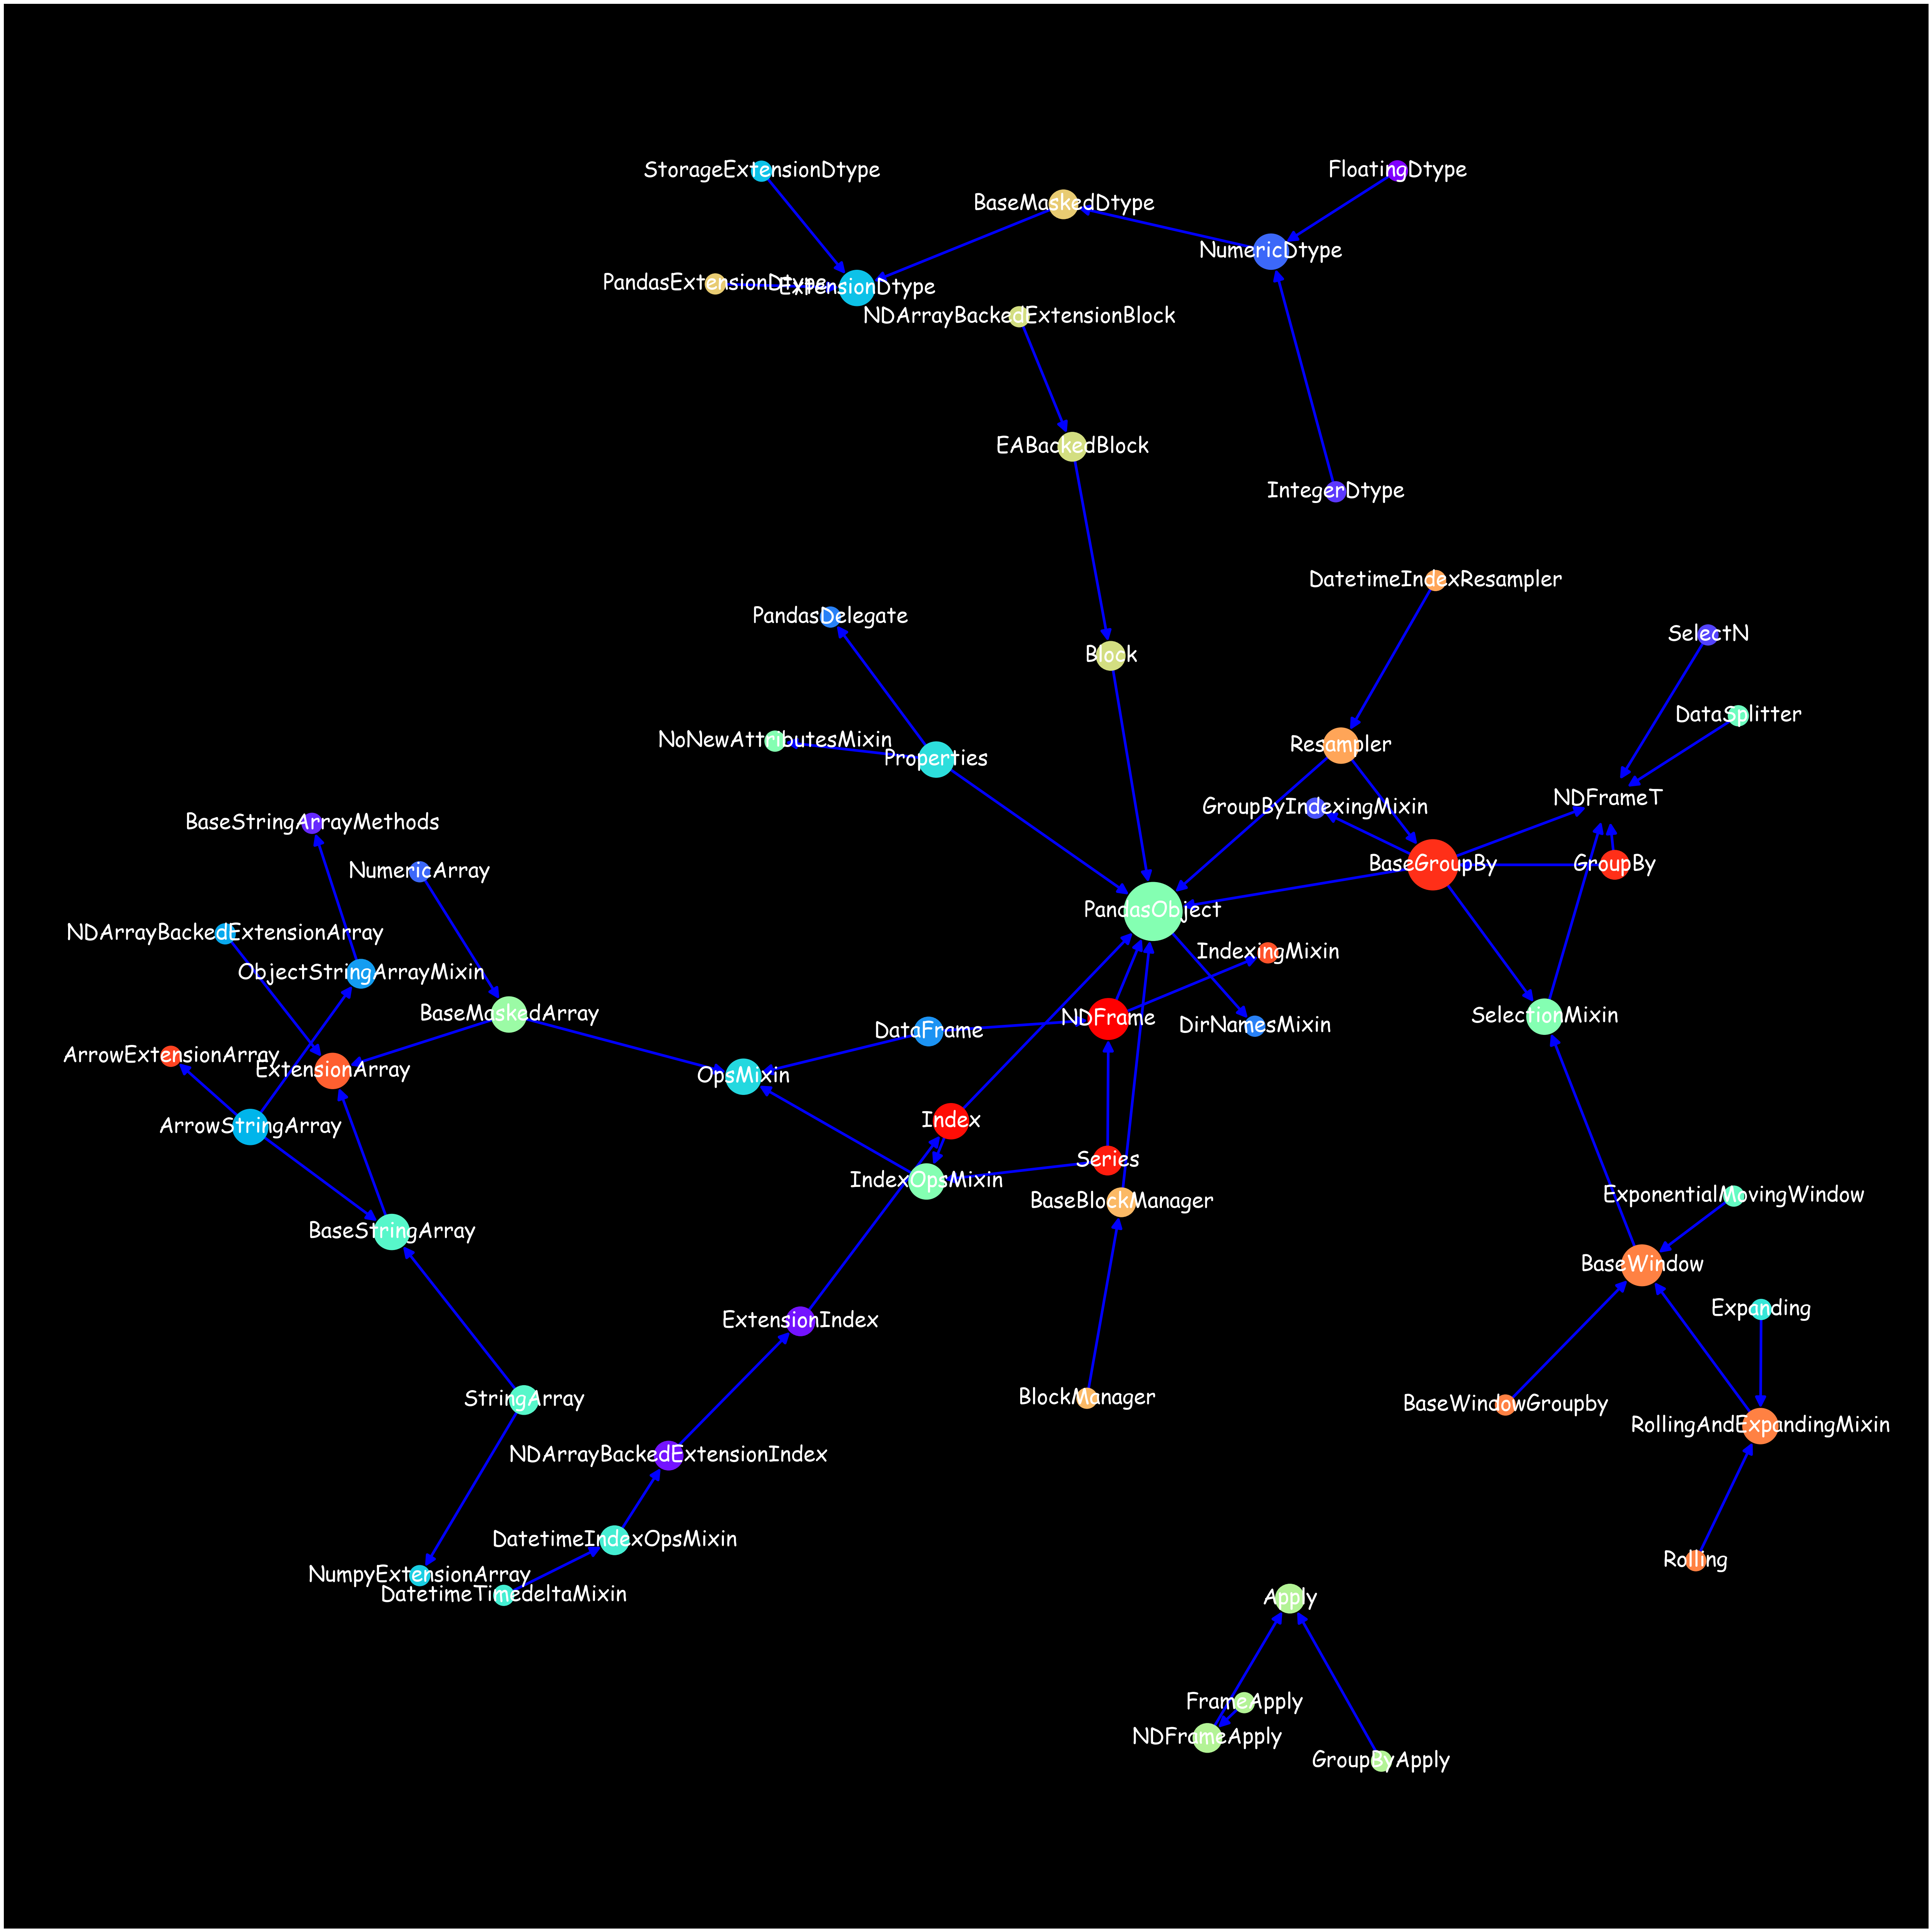

In [37]:
for i in range(49, 50):
    graph(lib, p.list_classes_for_graph, p.dict_classes_sizes, pp.class_counter_lt_gt, min_subclasses, max_subclasses, i, size_image=50)

In [38]:
# pp = Post_processing(lib, p.list_classes, p.list_files_sizes, p.list_classes_for_html, max_subclasses, min_subclasses)
# pp.save()
# #g = graph(lib, p.list_classes_for_graph, p.dict_classes_sizes, pp.class_counter_lt_gt, min_subclasses, max_subclasses)
# g = None
# i = min_subclasses

# while True:
#     pp = Post_processing(lib, p.list_classes, p.list_files_sizes, p.list_classes_for_html, max_subclasses, i)
#     pp.save()
#     g = graph(lib, p.list_classes_for_graph, p.dict_classes_sizes, pp.class_counter_lt_gt, i, max_subclasses, g)
#     i += 1

In [39]:
def graph4(lib, list_classes_for_graph, dict_classes_sizes, class_counter_lt_gt, min_subclasses, max_subclasses, seed, pos=None, size_image=50):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_image, size_image)
    fig.patch.set_visible(False)
    ax.set_facecolor('k')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    DG = nx.DiGraph()
    G = nx.Graph()

    for i in list_classes_for_graph:
        if i[0] not in class_counter_lt_gt and i[1] not in class_counter_lt_gt:
            DG.add_edge(i[0], i[1])
            G.add_edge(i[0], i[1])
            
    #print(G.nodes())

    df = pd.DataFrame(list(G.degree), columns=['node','degree']).set_index('node')
    if df.empty:
        print("Graph is empty")
        sys.exit()
    df_size = pd.DataFrame({'node': list(dict_classes_sizes.keys()), 'size': list(dict_classes_sizes.values())})
    df = pd.merge(df, df_size, how='left', on='node')
    df['color'] = df['size'].rank()
    vmin = df['color'].min()
    vmax = df['color'].max()
    cmap = plt.cm.rainbow

    if pos == None:
        pos = nx.spring_layout(G, k=0.30, scale=2, center=[0,0], seed=seed)
    nx.draw_networkx(DG, pos=pos, arrows=True, arrowsize=40, with_labels=False, node_size=df.degree*1500, node_color=df['color'],\
                     edge_color='k', width=5, font_size=40, font_weight='normal', font_color='w', font_family='comic sans ms', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.savefig(f'nodes.png')
    nx.draw_networkx(DG, pos=pos, arrows=True, arrowsize=40, with_labels=False, node_size=df.degree*1500, node_color='k',\
                     edge_color='b', width=5, font_size=40, font_weight='normal', font_color='w', font_family='comic sans ms', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.savefig(f'edges.png')
    nx.draw_networkx(DG, pos=pos, arrows=True, arrowsize=40, with_labels=True, node_size=df.degree*1500, node_color='k',\
                     edge_color='k', width=5, font_size=40, font_weight='normal', font_color='w', font_family='comic sans ms', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.savefig(f'labels.png')
    ax.set_facecolor('w')
    nx.draw_networkx(DG, pos=pos, arrows=True, arrowsize=40, with_labels=True, node_size=df.degree*1500, node_color='w',\
                     edge_color='w', width=5, font_size=40, font_weight='bold', font_color='k', font_family='comic sans ms', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.savefig(f'labels_k.png')
    #return pos

C:\Users\ksn\AppData\Local\Programs\Python\Python313\Lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
C:\Users\ksn\AppData\Local\Programs\Python\Python313\Lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(
C:\Users\ksn\AppData\Local\Programs\Python\Python313\Lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


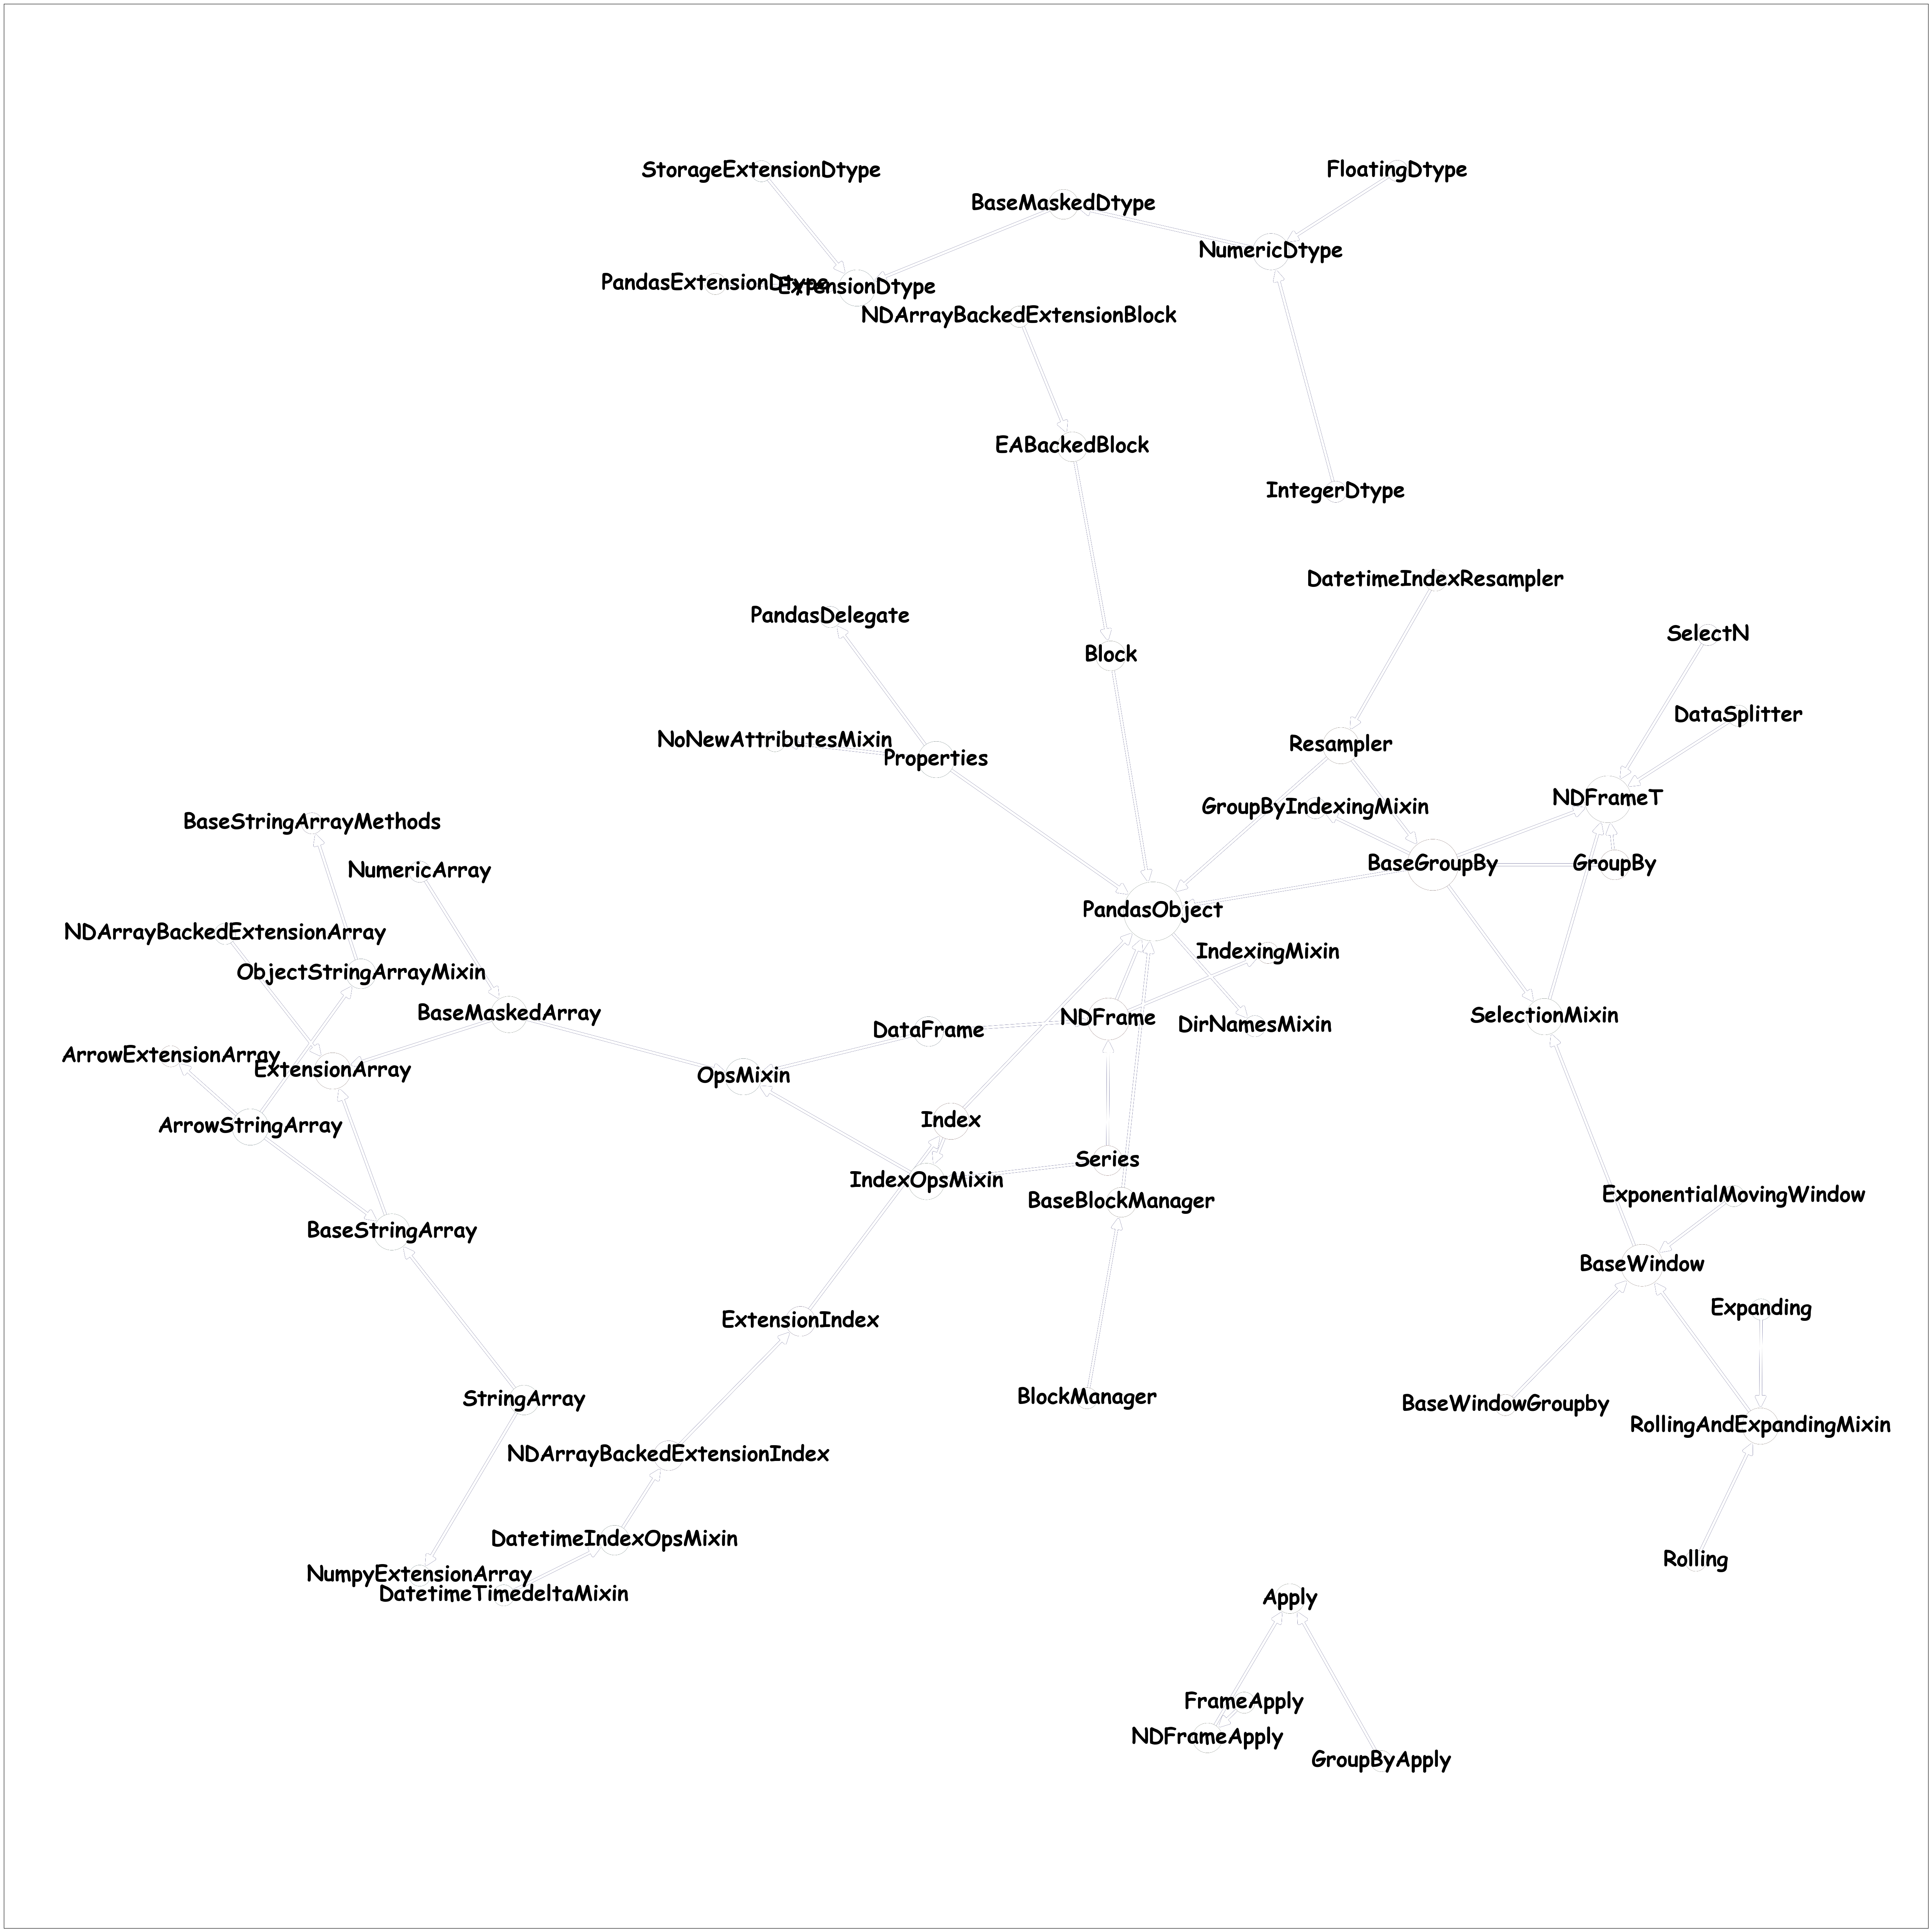

In [40]:
graph4(lib, p.list_classes_for_graph, p.dict_classes_sizes, pp.class_counter_lt_gt, min_subclasses, max_subclasses, 49, size_image=50)